In [14]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data_combined.csv')
df_f = pd.read_csv('features2.csv')

In [3]:
df

,solubility,SMILES
0,-2.1800,ClCC(Cl)(Cl)Cl
1,-2.0000,CC(Cl)(Cl)Cl
2,-1.7400,ClC(Cl)C(Cl)Cl
3,-1.4800,ClCC(Cl)Cl
4,-3.0400,FC(F)(Cl)C(F)(Cl)Cl
...,...,...
4490,-3.3319,NS(=O)(=O)c1ccc(C(=O)c2ccc(CNCc3ccccc3)cc2)s1
4491,-2.1669,CCCCNCc1ccc(C(=O)c2ccc(S(N)(=O)=O)s2)cc1
4492,-1.4812,NS(=O)(=O)c1ccc(C(=O)c2ccc(CN3CCOCC3)cc2)s1
4493,-1.8802,CN1CCN(Cc2ccc(C(=O)c3ccc(S(N)(=O)=O)s3)cc2)CC1


In [4]:
df_f

,MolLogP,MolWt,NumRotatableBonds,num_aromatic_atoms,num_heavy_atoms,Aromatic_Proportion,valence_electrons,num_aromatic_rings,exact_MolWt,heavyatomWt,LASA
0,2.5954,167.850,0.0,0,6,0.000000,38,0,165.891061,165.834,56.317258
1,2.3765,133.405,0.0,0,5,0.000000,32,0,131.930033,130.381,46.013992
2,2.5938,167.850,1.0,0,6,0.000000,38,0,165.891061,165.834,56.317258
3,2.0289,133.405,1.0,0,5,0.000000,32,0,131.930033,130.381,46.013992
4,2.9189,187.375,1.0,0,8,0.000000,50,0,185.901768,187.375,58.510598
...,...,...,...,...,...,...,...,...,...,...,...
4490,2.9163,386.498,7.0,17,26,0.653846,134,3,386.075884,368.354,156.092832
4491,2.5162,352.481,8.0,11,23,0.478261,124,2,352.091535,332.321,140.130564
4492,1.4587,366.464,5.0,11,24,0.458333,128,2,366.070799,348.320,144.448250
4493,1.3739,379.507,5.0,11,25,0.440000,134,2,379.102434,358.339,151.459480


In [3]:
df_merged = pd.concat([df, df_f], axis=1)

In [4]:
df_merged.drop(columns = ['SMILES'], inplace = True)

In [5]:
df_merged

,solubility,MolLogP,MolWt,NumRotatableBonds,num_aromatic_atoms,num_heavy_atoms,Aromatic_Proportion,valence_electrons,num_aromatic_rings,exact_MolWt,heavyatomWt,LASA
0,-2.1800,2.5954,167.850,0.0,0,6,0.000000,38,0,165.891061,165.834,56.317258
1,-2.0000,2.3765,133.405,0.0,0,5,0.000000,32,0,131.930033,130.381,46.013992
2,-1.7400,2.5938,167.850,1.0,0,6,0.000000,38,0,165.891061,165.834,56.317258
3,-1.4800,2.0289,133.405,1.0,0,5,0.000000,32,0,131.930033,130.381,46.013992
4,-3.0400,2.9189,187.375,1.0,0,8,0.000000,50,0,185.901768,187.375,58.510598
...,...,...,...,...,...,...,...,...,...,...,...,...
4490,-3.3319,2.9163,386.498,7.0,17,26,0.653846,134,3,386.075884,368.354,156.092832
4491,-2.1669,2.5162,352.481,8.0,11,23,0.478261,124,2,352.091535,332.321,140.130564
4492,-1.4812,1.4587,366.464,5.0,11,24,0.458333,128,2,366.070799,348.320,144.448250
4493,-1.8802,1.3739,379.507,5.0,11,25,0.440000,134,2,379.102434,358.339,151.459480


In [6]:
from pycaret.regression import *

In [7]:
model = setup(data = df_merged, target = 'solubility', train_size=0.8)

,Description,Value
0,Session id,8743
1,Target,solubility
2,Target type,Regression
3,Original data shape,"(4495, 12)"
4,Transformed data shape,"(4495, 12)"
5,Transformed train set shape,"(3596, 12)"
6,Transformed test set shape,"(899, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [13]:
## Model Comparison
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4580,0.5794,0.7598,0.8613,0.2223,0.6047,0.1990
rf,Random Forest Regressor,0.4947,0.5864,0.7639,0.8596,0.2209,0.6472,0.4170
lightgbm,Light Gradient Boosting Machine,0.5807,0.6707,0.8171,0.8389,0.2415,0.7330,0.0720
gbr,Gradient Boosting Regressor,0.6484,0.7711,0.8768,0.8151,0.2623,0.8119,0.1680
dt,Decision Tree Regressor,0.5610,0.9121,0.9536,0.7809,0.2705,0.7250,0.0190
ada,AdaBoost Regressor,0.8148,1.0780,1.0376,0.7415,0.2985,1.1876,0.0870
lr,Linear Regression,0.8160,1.1513,1.0725,0.7235,0.3146,1.0211,0.6420
ridge,Ridge Regression,0.8160,1.1512,1.0725,0.7235,0.3146,1.0213,0.0150
br,Bayesian Ridge,0.8164,1.1511,1.0724,0.7235,0.3149,1.0231,0.0140
huber,Huber Regressor,0.8175,1.1657,1.0791,0.7196,0.3164,0.9879,0.0320


ExtraTreesRegressor(n_jobs=-1, random_state=3680)

## Random forest

In [10]:
model_rfr = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5262,0.7225,0.8500,0.8149,0.2432,0.3511
1,0.4753,0.5363,0.7323,0.8612,0.2278,1.1839
2,0.4930,0.6077,0.7796,0.8657,0.2306,0.6593
3,0.4890,0.5520,0.7430,0.8207,0.2438,1.3185
4,0.4855,0.4949,0.7035,0.8783,0.2030,0.4951
5,0.5630,0.6951,0.8337,0.8568,0.2375,0.5315
6,0.5428,0.6719,0.8197,0.8477,0.2341,0.4455
7,0.4783,0.4902,0.7001,0.8836,0.2056,0.3659
8,0.5135,0.6303,0.7939,0.8629,0.2027,0.4454


In [11]:
## Hyperparameter tuning optimizing on r2
model_rfr_tuned = tune_model(model_rfr, n_iter = 50, optimize = 'r2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5464,0.6953,0.8339,0.8219,0.2421,0.3775
1,0.5189,0.5614,0.7492,0.8547,0.2428,1.1509
2,0.5627,0.6818,0.8257,0.8494,0.2575,1.1297
3,0.5497,0.6220,0.7886,0.7980,0.2645,1.4492
4,0.5631,0.6230,0.7893,0.8468,0.2359,0.6643
5,0.6169,0.7633,0.8737,0.8428,0.2450,0.6478
6,0.6072,0.7243,0.8510,0.8358,0.2476,0.6528
7,0.5685,0.6111,0.7817,0.8548,0.2317,0.5180
8,0.5934,0.7606,0.8721,0.8345,0.2345,0.7072


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Model Analysis

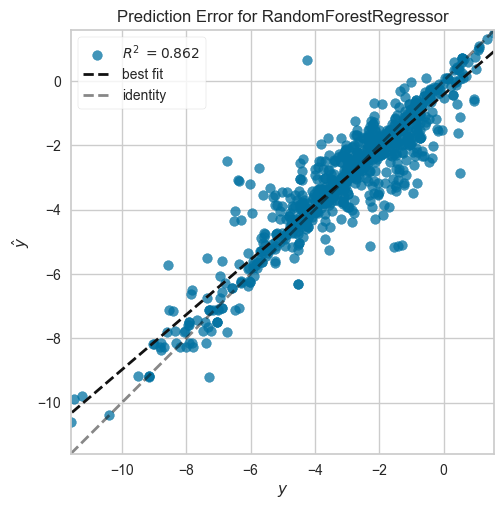

In [13]:
## Error plot
plot_model(model_rfr, 'error')

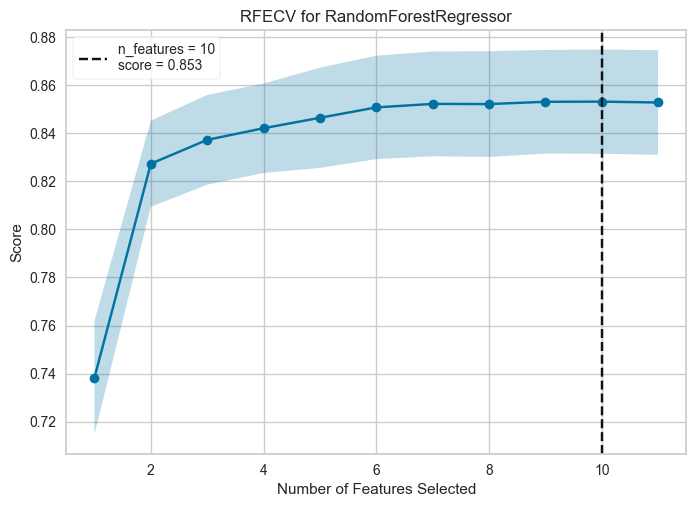

In [14]:
## Recursive feature selection
plot_model(model_rfr, 'rfe')

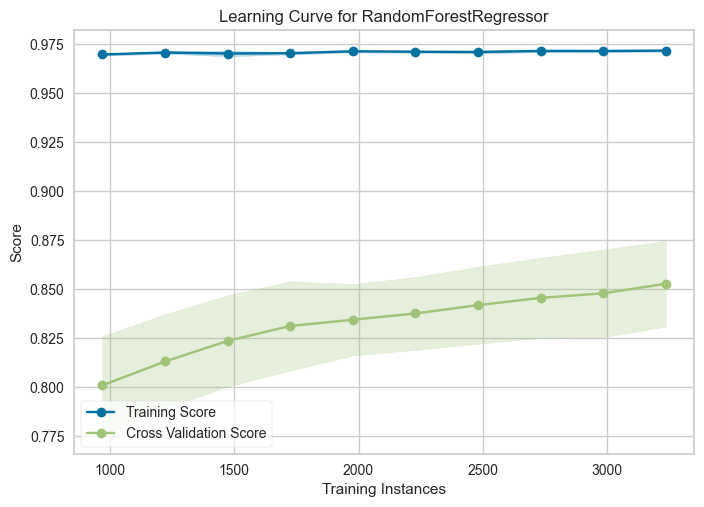

In [15]:
## Learning Curve
plot_model(model_rfr, 'learning')

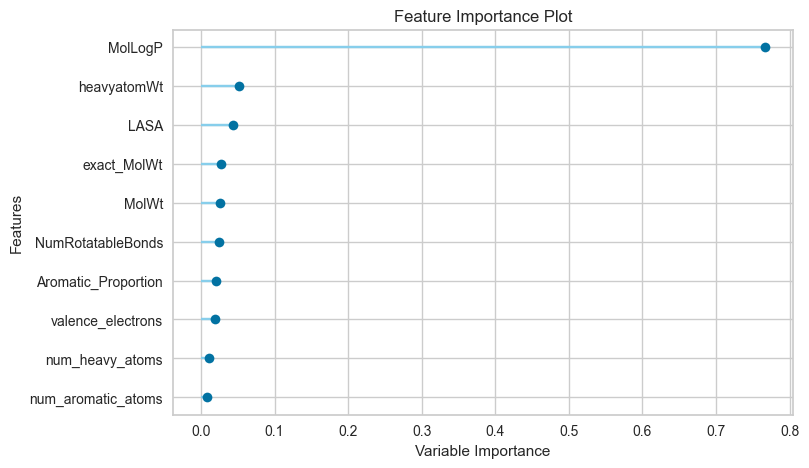

In [16]:
## Feature Importance
plot_model(model_rfr, 'feature')

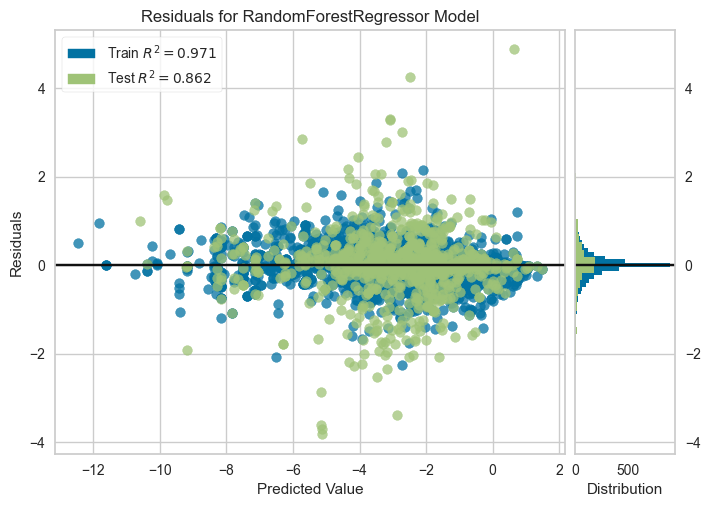

In [17]:
## Residuals
plot_model(model_rfr, 'residuals')

## Extra Trees

In [8]:
model_ET = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4479,0.5060,0.7113,0.8788,0.2129,0.3731
1,0.4381,0.5345,0.7311,0.8863,0.2197,0.4703
2,0.4882,0.6627,0.8141,0.8643,0.2371,0.3818
3,0.4717,0.5380,0.7335,0.8598,0.2166,0.5017
4,0.4960,0.7350,0.8573,0.8254,0.2330,0.3916
5,0.4589,0.5583,0.7472,0.8736,0.2151,0.2561
6,0.4279,0.5315,0.7290,0.8548,0.2118,0.3406
7,0.4760,0.6419,0.8012,0.8536,0.2411,1.1153
8,0.4263,0.4932,0.7023,0.8687,0.2108,0.5475


In [11]:
## Hyperparameter tuning optimizing on mae
model_ET_tuned = tune_model(model_ET, n_iter = 50, optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6262,0.7156,0.8459,0.8286,0.2513,0.6303
1,0.5879,0.6807,0.8250,0.8552,0.2465,0.5956
2,0.6072,0.7049,0.8396,0.8556,0.2452,0.4879
3,0.5909,0.6139,0.7835,0.8400,0.2395,0.6940
4,0.6899,0.9318,0.9653,0.7786,0.2753,0.6004
5,0.6223,0.6705,0.8188,0.8482,0.2441,0.6146
6,0.5871,0.6550,0.8093,0.8210,0.2387,0.4503
7,0.6154,0.7506,0.8664,0.8288,0.2646,1.1830
8,0.5894,0.6499,0.8062,0.8270,0.2404,1.2584


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Model Analysis

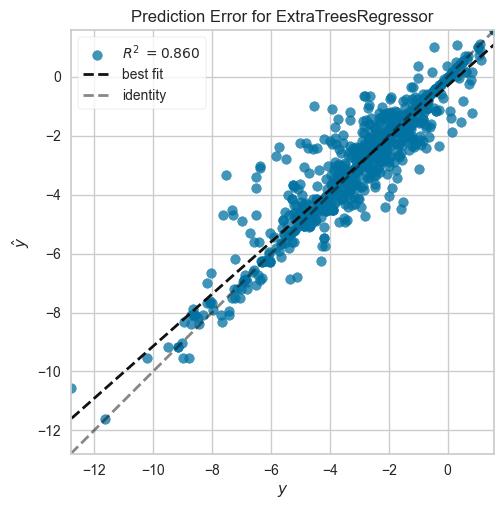

In [15]:
plot_model(model_ET, 'error')

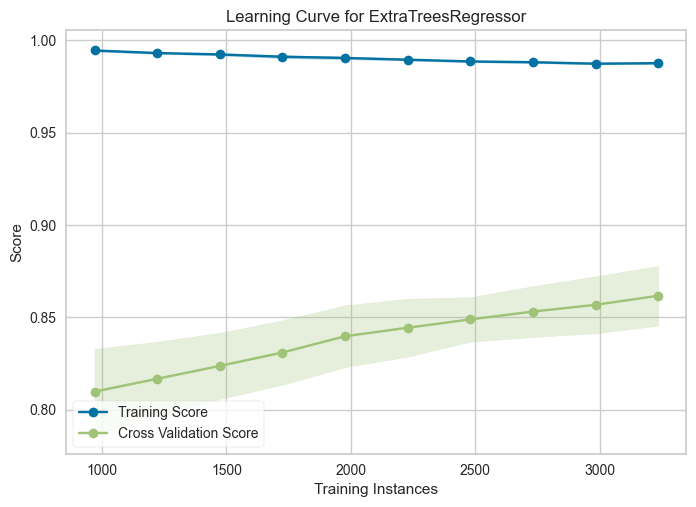

In [16]:
plot_model(model_ET, 'learning')

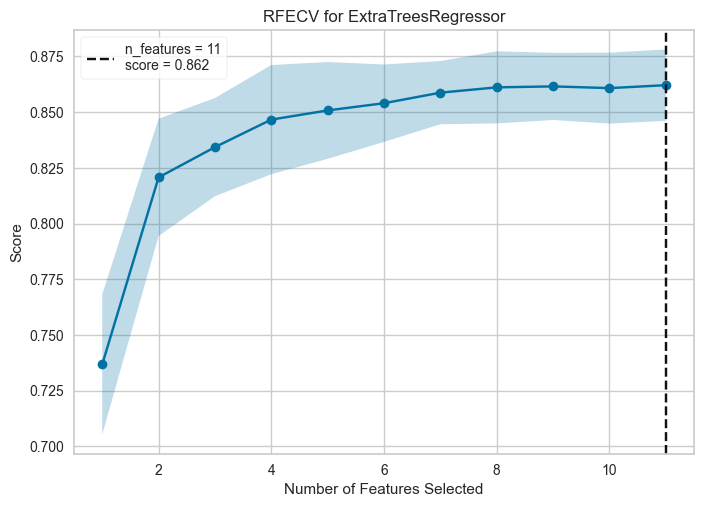

In [17]:
plot_model(model_ET, 'rfe')

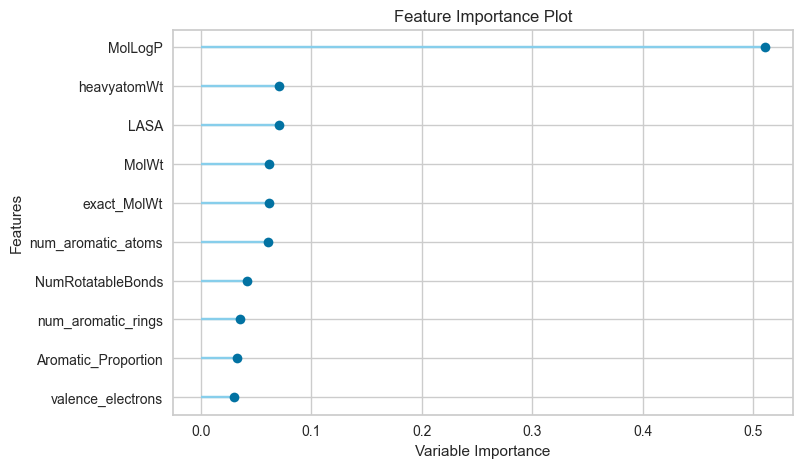

In [18]:
plot_model(model_ET, 'feature')

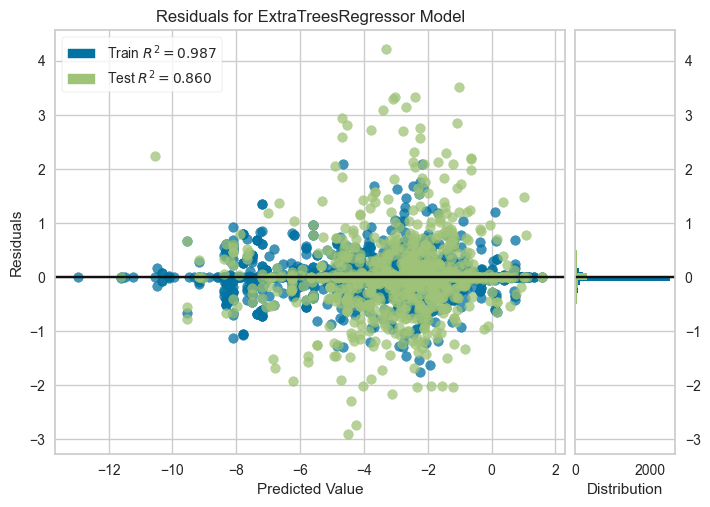

In [19]:
plot_model(model_ET, 'residuals')

In [24]:
import pickle
with open('model_ET.pickle','wb') as f:
    pickle.dump(model_ET, f)